In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from datetime import datetime

In [22]:
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [36]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액_20250304002122.csv"
ori = pd.read_csv(file_path, encoding = "EUC-KR")
ori.columns = ['date','category','internet','mobile']
ori.tail()

,date,category,internet,mobile
643,2024.12 p),농축수산물,255558,862057
644,2024.12 p),생활용품,366928,1242391
645,2024.12 p),여행 및 교통서비스,754717,1478405
646,2024.12 p),문화 및 레저서비스,82688,117604
647,2024.12 p),음식서비스,34997,2808932


In [37]:
ori['date'] = ori['date'].map(lambda x:x.rstrip(' p)'))
ori['date'] = pd.to_datetime(ori['date'], format ='%Y.%m')
ori

,date,category,internet,mobile
0,2019-01-01,의복,453476,653845
1,2019-01-01,신발,57560,102086
2,2019-01-01,화장품,328732,572616
3,2019-01-01,음·식료품,397250,796103
4,2019-01-01,농축수산물,143447,269825
...,...,...,...,...
643,2024-12-01,농축수산물,255558,862057
644,2024-12-01,생활용품,366928,1242391
645,2024-12-01,여행 및 교통서비스,754717,1478405
646,2024-12-01,문화 및 레저서비스,82688,117604


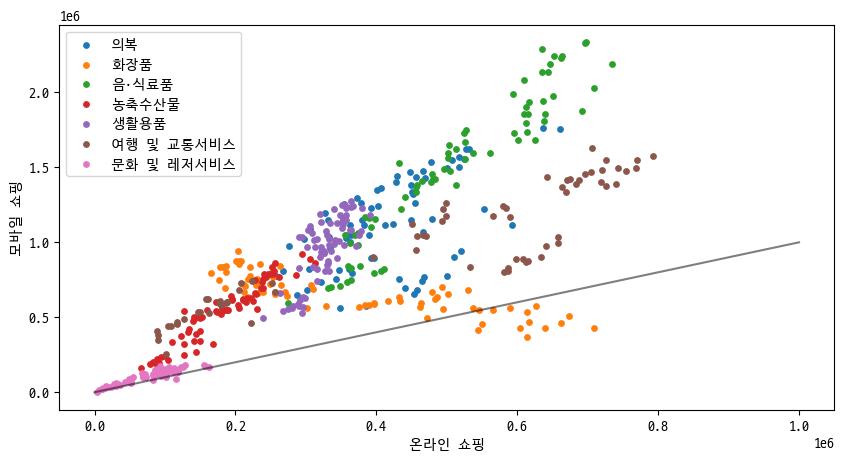

In [49]:
ori_data = ori.copy()
obj = ['의복','화장품','음·식료품','농축수산물','생활용품','여행 및 교통서비스','문화 및 레저서비스']
ori_data = ori_data[ori_data['category'].isin(obj)]

fig, ax = plt.subplots(figsize=(10,5))

category = obj

for cate in category:
    category_data = ori_data[ori_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 15, label = cate)

ax.set_xlabel("온라인 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.5)
plt.show()

- 대부분의 카테고리가 인터넷 보다는 모바일 쇼핑의 비중이 큰 것을 확인할 수 있다.
- 음·식료품과 여행 및 교통서비스, 의복의 소비 규모는 크나 그에 비해 문화 및 레저서비스의 데이터밀도는 낮고 인터넷과 모바일의 소비 비율이 비슷한 것으로 볼 수 있다.
- 제품의 신선도와 품질이 중요한 농축수산물의 경우에는 음·식료품에 비해 온라인 쇼핑 경향이 더 큰 것으로 보여진다.